## Load Data and Initial Grid Search

In [1]:
# Assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'
HANNAH = ''
ZIXUN = ''

ROOT_DIR = YASH
os.chdir(ROOT_DIR + 'testing-framework/')

DATA_NAME = 'full-pastis-gray-wavelet'
GROUP = 'layer'
SKIP_OPTIMIZE_STEP = True

# os.mkdir(DATA_NAME)
# os.mkdir(os.path.join(DATA_NAME, "CSVs"))
# os.mkdir(os.path.join(DATA_NAME, "plots"))

In [2]:
''' Comment out the USE_MATLAB within utilities.py if you do not have MATLAB installed'''
from utilities import *
from plot_utilities import *

np.random.seed(0)

In [3]:
group_data_map = pd.read_pickle(f'approx1e5-{DATA_NAME}/group_data_map.pickle')
min_group, max_group = 2, sorted(group_data_map)[-1]
group_data_map

{2: array([-99.93568594, -91.00645124, -88.54430615, ...,  88.80035968,
         91.52850405,  94.44944672]),
 3: array([-76.13432886, -63.02074639, -60.52416619, ...,  65.19608846,
         65.26965934,  69.44498554]),
 4: array([-51.73647153, -48.46756551, -45.83266202, ...,  48.25087164,
         50.33643736,  64.88734264]),
 5: array([-47.95678457, -36.2290875 , -34.21402956, ...,  32.91894773,
         36.11999915,  42.17747737]),
 6: array([-23.87540781, -21.69502371, -19.77842932, ...,  18.532206  ,
         21.00124659,  44.79754701]),
 7: array([-19.12997336, -11.63154378, -10.24156022, ...,  10.34018388,
         11.58181396,  20.30569957]),
 8: array([-18.71256003,  -5.38310051,  -4.75432793, ...,   4.71546986,
          5.46900035,  20.5891778 ])}

In [4]:
cdfs_list = [i for i in os.listdir("CDFs/")]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
all_cdfs_df = pd.DataFrame({'(r,eta),cdf' : sorted(all_cdfs.items())})
all_cdfs_df['r'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[0].str[1])
all_cdfs_df['cdf'] = pd.Series(all_cdfs_df["(r,eta),cdf"].str[1])
all_cdfs_df['variance'] = all_cdfs_df.apply(lambda row : variance_prior(row.loc['r'],row.loc['eta']), axis = 1)
all_cdfs_df['kurtosis'] = all_cdfs_df.apply(lambda row : kurtosis_prior(row.loc['r'],row.loc['eta']), axis = 1)
revised_grid_df = pd.DataFrame()
filtered_df_dict = dict()
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:785: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:790: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:790: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\testing-framework\utilities.py:790: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.ga

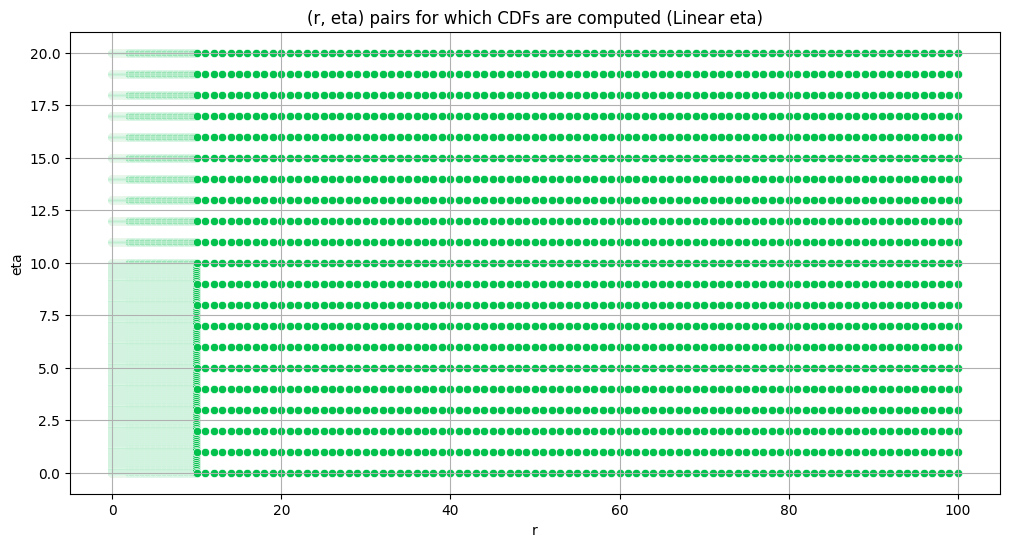

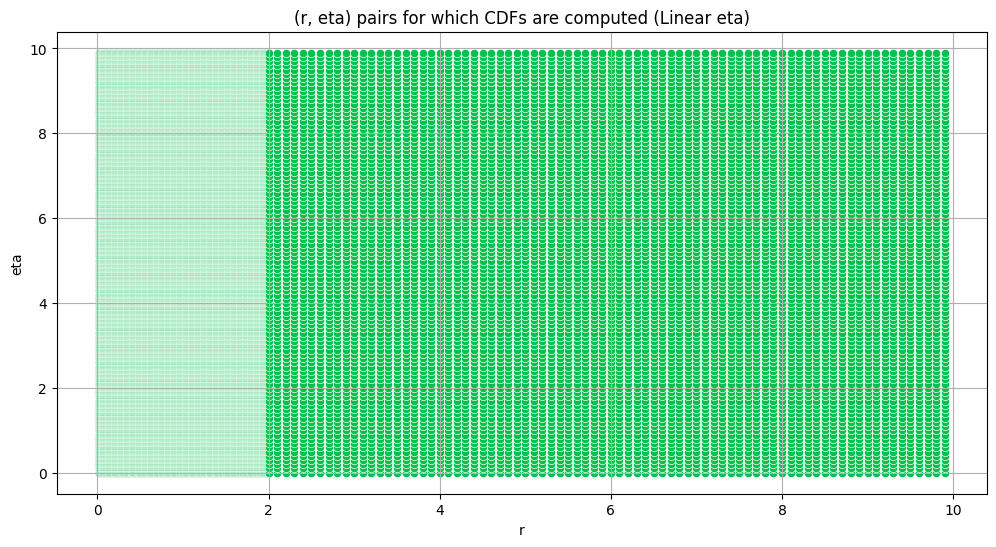

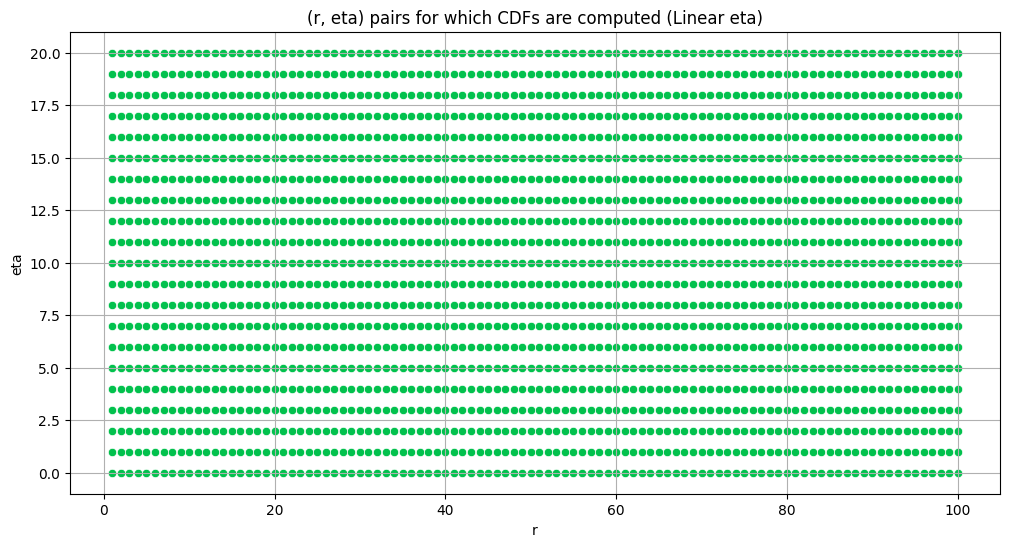

c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\yashd\.conda\envs\hbmv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,r,eta,variance,kurtosis
count,32857.000000,32857.000000,3.254900e+04,3.209000e+04
mean,5.494223,6.160788,inf,inf
std,14.067384,4.423588,NaN,NaN
min,0.020000,0.000000,5.827789e-01,6.307840e-03
25%,0.760000,2.800000,1.030670e+00,1.443676e-01
50%,1.490000,5.600000,2.546243e+00,3.183680e-01
75%,4.300000,8.500000,1.573186e+01,7.186320e-01
max,100.000000,20.000000,inf,inf


In [5]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [6]:
def combo_map_plot(df, cols, extra_boundary = 0.5, plot_name = ''):
    cols = sorted(cols)
    df = df.copy() 
    for col in cols:
        df[col] = df[col].replace({True: col[5:], False: ''})
    df['map'] = df.apply(lambda row : ''.join([row.loc[col].capitalize() +'' for col in cols]), axis = 1)
    temp = df[(df['map'] != '') & (df['map'] != 'Kurt')]
    df = df[(df['r'] >= temp['r'].min() - extra_boundary) & 
            (df['r'] <= temp['r'].max() + extra_boundary) &
            (df['eta'] >= temp['eta'].min() - extra_boundary) & 
            (df['eta'] <= temp['eta'].max() + extra_boundary) ]
    fixed_palette = {
    'Var': 'xkcd:bright yellow',
    'Kstest': 'blue',
    'Kurt': 'orange',
    'KstestVar': 'cyan',
    'KurtVar': 'red',
    'KstestKurt': 'brown',
    'KstestKurtVar': 'xkcd:shamrock green',
    '': 'gray'
}
    fig, ax = plt.subplots()
    fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=0.8)
    plt.legend(loc = 'upper left')
    if plot_name:
        plt.title(plot_name)
    else:
        plt.title(f"{', '.join([col[5:].capitalize() for col in cols])} with boundary {extra_boundary}")
    plt.show()
    return fig


Layer 2
Number of samples: 3180


100%|██████████| 32857/32857 [00:33<00:00, 977.16it/s] 


Finding Minimum after computing 32857 CDFs


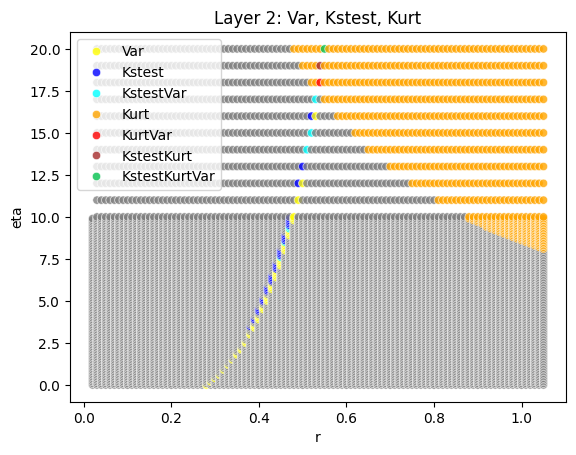


Layer 3


KeyboardInterrupt: 

In [7]:
''' Only need to run commented code once'''
master_df = pd.DataFrame(columns = [GROUP]).set_index(GROUP)#, 'num_samples', 'initial_param', 'kstest_stat_initial', 'kstest_stat_cutoff_0.05'])
sorted_params = sorted(all_cdfs)
n_bootstrap = 100000
ci = 0.99
    
for i, group in enumerate(np.arange(min_group, max_group+1)):

    print(f"\n{GROUP.capitalize()} {group}")
    obs_var, var_lower, var_upper, var_values = bootstrap_metric(group_data_map[group], n_bootstrap=n_bootstrap, metric=np.var, ci=ci)
    obs_kurt, kurt_lower, kurt_upper, kurt_values = bootstrap_metric(group_data_map[group], n_bootstrap=n_bootstrap, metric= stats.kurtosis, ci=ci)  
    # If you want to extract multiple CIs, can do np.percentile on var_values OR kurt_values
    sample = group_data_map[group]
    print(f"Number of samples: {sample.size}")
    group_cdf_df = all_cdfs_df.sort_values(['r', 'eta']) # NOTE: THIS IS all_cdfs -> FULL GRID SEARCH
    group_cdfs = {x[0]:x[1] for x in group_cdf_df['(r,eta),cdf']}
    ksstats, initial_param, min_stat = gridsearch(sample, group_cdfs, debug=True)
    initial_param = np.array(initial_param)
    master_df.loc[group, 'num_samples'] = sample.size
    master_df.loc[group, 'kstest_stat_initial'] = min_stat
    cutoff = stats.kstwo(n=sample.size).isf(0.05)
    master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff
    group_cdf_df['ksstat'] = ksstats
    group_cdf_df['pass_kstest'] = group_cdf_df['ksstat'].apply(lambda x: True if x < cutoff else False)
    group_cdf_df['pass_var'] = (group_cdf_df['variance'] > var_lower) & (group_cdf_df['variance'] < var_upper)
    group_cdf_df['pass_kurt'] = (group_cdf_df['kurtosis'] > kurt_lower) & (group_cdf_df['kurtosis'] < kurt_upper)
    filtered_df_dict[group] = group_cdf_df
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_map_plot(group_cdf_df, cols, plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}")
    fig.figure.savefig(f'{DATA_NAME}/plots/full_grid_search_combo_plot_layer{group}.png', bbox_inches = 'tight', dpi=600)

pd.to_pickle(filtered_df_dict, f"{DATA_NAME}/filtered_df_dict-full.pickle")
master_df